# K-Means Clustering algorithm implementation from scratch.

### - Importing libraries and reading the data.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import datetime as dt
import random
import statistics as st
import math
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'group10.csv')
df.head()

,1.782364208575935152e+02,5.557729419427169404e+01,3.111306154843097005e+01,3.190172943156652607e+01,5.082867444721104278e+01
0,170.073124,46.121755,27.077152,28.016681,47.931412
1,179.125338,57.133051,31.942062,33.041163,51.038269
2,180.965093,55.846377,30.929086,32.024056,52.047072
3,179.039029,57.393111,32.010669,33.029033,50.963679
4,178.935184,55.226819,30.957440,31.981902,50.925238


### - Renaming the columns and checking if any missing data.

In [3]:
df.rename(columns = {'1.782364208575935152e+02':'Height',
                     '5.557729419427169404e+01':'Weight',
                    '3.111306154843097005e+01':'BMI',
                    '3.190172943156652607e+01':'length between the shoulders',
                    '5.082867444721104278e+01':'length of the arms'}, inplace = True)

In [4]:
df.head()

,Height,Weight,BMI,length between the shoulders,length of the arms
0,170.073124,46.121755,27.077152,28.016681,47.931412
1,179.125338,57.133051,31.942062,33.041163,51.038269
2,180.965093,55.846377,30.929086,32.024056,52.047072
3,179.039029,57.393111,32.010669,33.029033,50.963679
4,178.935184,55.226819,30.957440,31.981902,50.925238


In [5]:
df.isnull().sum()

Height                          0
Weight                          0
BMI                             0
length between the shoulders    0
length of the arms              0
dtype: int64

In [6]:
df1= df.copy()

##  1- Normalizing the data to be on the same scale.

In [7]:
normalized_df=(df1-df1.mean())/(df1.std())
normalized_df.head()

,Height,Weight,BMI,length between the shoulders,length of the arms
0,-0.551550,-1.037116,-0.925660,-0.884489,-0.437608
1,0.461048,0.751820,0.613905,0.736996,0.428003
2,0.666846,0.542782,0.293335,0.408759,0.709069
3,0.451393,0.794070,0.635616,0.733082,0.407221
4,0.439777,0.442126,0.302308,0.395155,0.396511


# Function implementation.


## A function made for getting the centroids.
- it checks if it is the first iteration , the centroids will be randomly choosen.
- from the second iteration it will be calculated using the points from each group.

- **Note that:** in the function we enter the normalized_df , we could nourmalized it in the function if required!.

In [8]:
def get_centroid(data_points, iteration, k, groups):
    
    centroids =[]
    
    if iteration == 0: 
        #Choosing random centroid in the first iteration.
        for i in range(k): 
            centroids.append(data_points[np.random.randint(len(data_points))])
            
    else:
        #looping on each group to get the mean of each point to get the centroid.
        for g in range(len(groups)):
            group = groups[g]
            temp = []                                                          #H ,w ,bmi, length shoulder-arms
            #looping on the points inside the sample points ---> ex: sample 1 :[x, y, z,        w,    l]
            for n in range(len(data_points[0])):
                num = 0
                
                for i in range(len(group)):
                    
                    sample_index = group[i]
                    num += data_points[sample_index][n]
                    
                    average = (num / (len(group)))
                    
                # the temp value after each iteration will add the mean of each point # ex: first iter --> [x]    
                temp.append(average)
            #at the end each temp array will represent a centroid in the centroids array --> [ [c1] , [c2] , [c3]  ]
            centroids.append(temp)
    return centroids

## K_means function 
- **Input:** the function takes the dataframe , k (No. of Clusters) , The no. of iterations.
- **Output:** Array containing the cluster no. that corresponds to the sample.


In [9]:
def k_means_clustering(data , k , iter_numbers):
    #converting the dataframe points into list of lists. [[sample1 points] , [sample2 points]]
    data_points = data.values.tolist()
    centroids = []
    groups = [] #representing the clusters in to groups [[g1] , [g2] , [g3]]
    
    for iteration in range(iter_numbers):

        centroids = get_centroid(data_points,iteration,k,groups)
        clusters = []
        for i in range(len(data_points)):

            distances = []

            for j in range(k):
                c = centroids[j]
                p = data_points[i]
                d = 0
                for n in range(len(c)):
                    d +=((c[n]-p[n])**2) 

                d = math.sqrt(d)
                distances.append(d)


            group_index=distances.index(min(distances)) 
            clusters.append(group_index)
            
            ## by the end of this loop we will have the clusters array representing each sample by the array index
            ## means that if the index was zero this represent sample 1 and array[0] = cluster that it belong to.


            groups = []
            unique_indexes = np.unique(clusters)
            for g in unique_indexes:
                pos = list(np.where(np.array(clusters) == g)[0])
                groups.append(pos)
            
            #representing the clusters in to groups [[g1] , [g2] , [g3]] we will use it to find the new centroid.
    
    return clusters

## Testing the function on sample1 at: 
- K= 3
- Samples = 1000 


In [14]:
N = 1000
sample1 = normalized_df.sample(n=N)

In [17]:
Clusters1 = k_means_clustering(sample1 , 3 , 5)

### Generating a new column represent each sample1's cluster number.

In [18]:
sample1['Cluster'] = Clusters1
sample1

,Height,Weight,BMI,length between the shoulders,length of the arms,Cluster
4696,-0.771269,0.205957,0.603198,0.050202,-0.706371,1
65485,1.214615,0.245134,-0.349793,0.413841,1.218350,0
57792,-0.465128,1.152899,1.530249,1.015105,-0.417990,2
86823,-0.664984,-1.095944,-0.906358,-1.244042,-0.691475,1
96015,-0.329331,-1.015015,-0.974445,-0.924974,-0.393671,1
...,...,...,...,...,...,...
83251,-0.350845,0.730384,0.993732,0.726641,-0.494600,2
65189,-1.451336,-1.950390,-1.564678,-1.888249,-1.523112,1
43023,-0.568257,0.850259,1.253063,0.741076,-0.677189,2
48671,-0.764658,0.488110,0.983603,0.421896,-0.670026,2


## Testing the function on sample2 at: 
- K= 5
- Samples = 1000 

In [19]:
N = 1000
sample2 = normalized_df.sample(n=N)

In [20]:
Clusters2 = k_means_clustering(sample2 , 5 , 5)

### Generating a new column represent each sample2's cluster number.

In [21]:
sample2['Cluster'] = Clusters2
sample2

,Height,Weight,BMI,length between the shoulders,length of the arms,Cluster
36098,0.910114,0.658129,0.313523,0.753110,0.966032,0
76543,-0.884657,-1.156346,-0.923563,-1.263443,-0.988006,3
1390,-0.661558,-0.033139,0.289460,0.049003,-0.682219,1
26101,-0.110598,0.206697,0.272346,0.069825,-0.119873,1
52936,-0.882110,-1.462045,-1.234781,-1.502463,-1.007766,3
...,...,...,...,...,...,...
59630,-1.450536,0.133755,0.942464,0.086709,-1.558237,1
95110,-0.777848,-1.658817,-1.516814,-1.560173,-0.717512,3
44076,-0.089489,-0.357293,-0.338761,-0.275220,-0.148575,1
78875,-0.775240,-1.706102,-1.573707,-1.529913,-0.691387,3


# Graph of the execution time of the K_means clustering algorithm.

## 1- At K = 3 

In [23]:
Ns =[100, 600,  1100,  1600,  2100,  2600,  3100,  3600,  4100, 4600]

import time
timers = []

for i in range(len(Ns)):
    sample = normalized_df.sample(n=Ns[i])
    start = time.time()
    Clusters = k_means_clustering(sample , 3 , 10)
    end = time.time()
    timers.append((end-start))

Text(0, 0.5, 'Time (sec)')

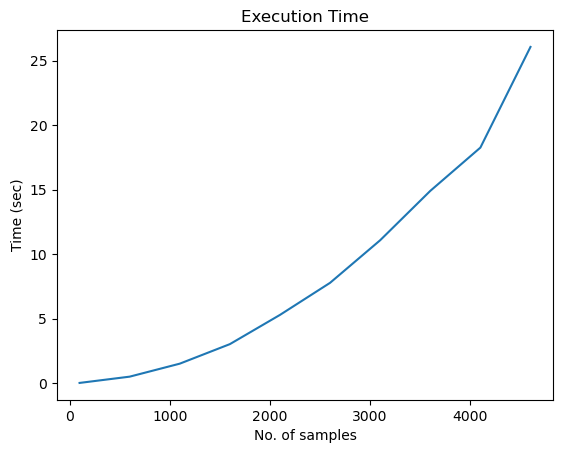

In [25]:
plt.plot(Ns,timers)
plt.title('Execution Time')
plt.xlabel('No. of samples')
plt.ylabel('Time (sec)')

## 2- At K = 5

In [26]:
Ns =[100, 600,  1100,  1600,  2100,  2600,  3100,  3600,  4100, 4600]

import time
timers = []

for i in range(len(Ns)):
    sample = normalized_df.sample(n=Ns[i])
    start = time.time()
    Clusters = k_means_clustering(sample , 5 , 10)
    end = time.time()
    timers.append((end-start))

Text(0, 0.5, 'Time (sec)')

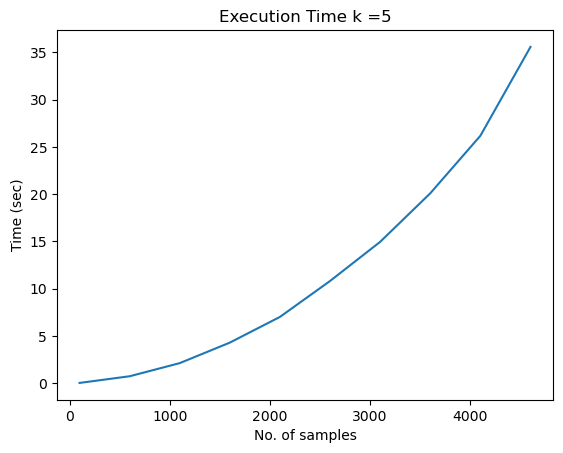

In [27]:
plt.plot(Ns,timers)
plt.title('Execution Time k =5')
plt.xlabel('No. of samples')
plt.ylabel('Time (sec)')

# Milestone 2.

## PCA Function


In [30]:
df_pca = df.copy()

In [34]:
normalized_pca_df=(df_pca-df_pca.mean())/(df_pca.std())
normalized_pca = normalized_pca_df.values.tolist()

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(normalized_pca)

PCA(n_components=2)

In [37]:
x_pca = pca.transform(normalized_pca)
x_pca

array([[-1.76534217,  0.26613236],
       [ 1.36874199, -0.08332799],
       [ 1.12421413,  0.4647206 ],
       ...,
       [-1.53533961,  0.62040911],
       [ 0.04835239,  2.72665303],
       [-2.7657177 ,  0.1216234 ]])

## Applying the k_means function on the reduced data by PCA

In [38]:
df_pc1 = pd.DataFrame(x_pca)

### Taking 1000 samples and k = 3

In [39]:
sample_pca = df_pc1.sample(n=1000)
Clusters_pca = k_means_clustering(sample_pca , 3, 10)

## Ploting the clusters in different colors.

Text(0.5, 1.0, 'K =3')

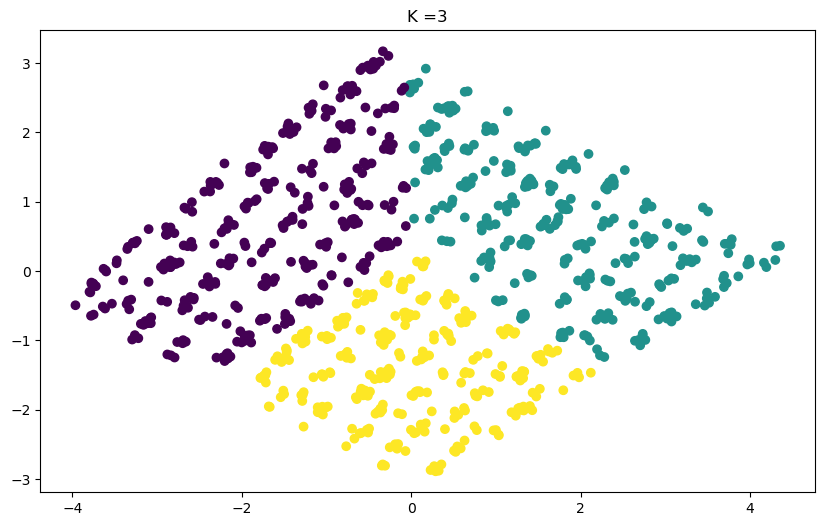

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(x=sample_pca.iloc[:,0], y=sample_pca.iloc[:,1], c=Clusters_pca)
plt.title('K =3')

### Taking 1000 samples and k = 5

In [45]:
sample_pca = df_pc1.sample(n=1000)
Clusters_pca = k_means_clustering(sample_pca , 5, 10)

Text(0.5, 1.0, 'K =5')

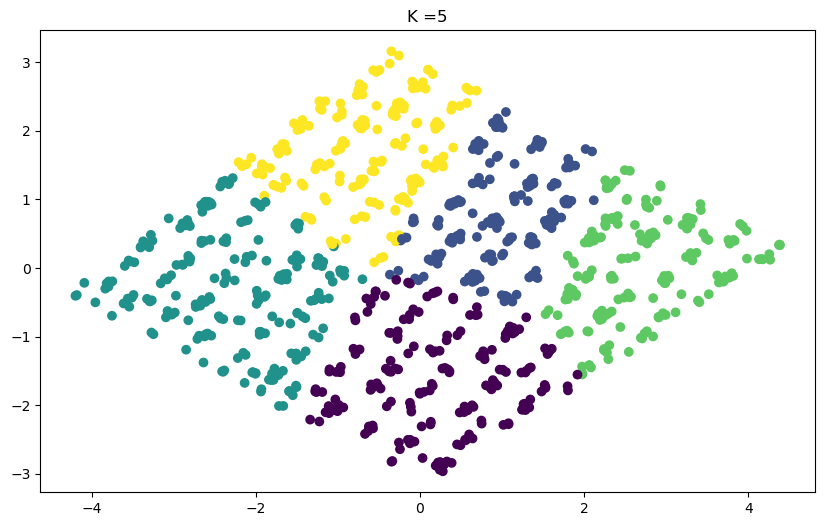

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(x=sample_pca.iloc[:,0], y=sample_pca.iloc[:,1], c=Clusters_pca)
plt.title('K =5')

## Execution time after PCA.

In [42]:
Ns =[100, 600,  1100,  1600,  2100,  2600,  3100,  3600,  4100, 4600]

import time
timers = []

for i in range(len(Ns)):
    sample = df_pc1.sample(n=Ns[i])
    start = time.time()
    Clusters = k_means_clustering(sample , 3 , 10)
    end = time.time()
    timers.append((end-start))

Text(0, 0.5, 'Time (sec)')

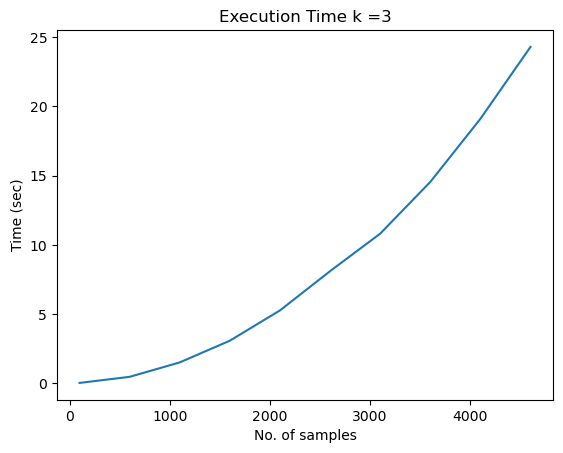

In [43]:
plt.plot(Ns,timers)
plt.title('Execution Time k =3')
plt.xlabel('No. of samples')
plt.ylabel('Time (sec)')

In [49]:
Ns =[100, 600,  1100,  1600,  2100,  2600,  3100,  3600,  4100, 4600]

import time
timers = []

for i in range(len(Ns)):
    sample = df_pc1.sample(n=Ns[i])
    start = time.time()
    Clusters = k_means_clustering(sample , 5 , 10)
    end = time.time()
    timers.append((end-start))

Text(0, 0.5, 'Time (sec)')

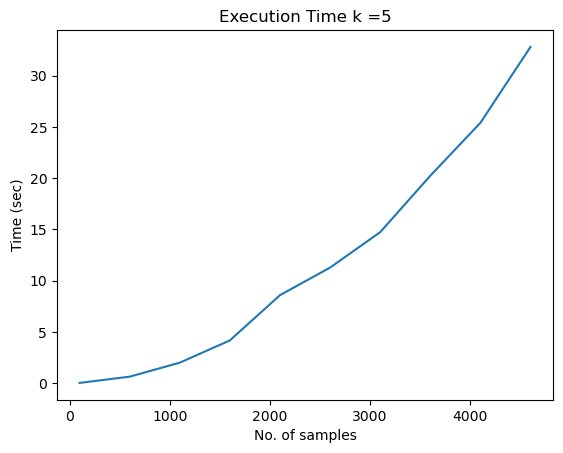

In [50]:
plt.plot(Ns,timers)
plt.title('Execution Time k =5')
plt.xlabel('No. of samples')
plt.ylabel('Time (sec)')

# Extra confirmation on our code accuracy by comparing to the predefined K_means.

## Choosing 2 columns which are known, Only for testing!.

In [51]:
testing = normalized_df.drop(['BMI', 'length between the shoulders' , 'length of the arms'], axis = 'columns')
testing.head()

,Height,Weight
0,-0.551550,-1.037116
1,0.461048,0.751820
2,0.666846,0.542782
3,0.451393,0.794070
4,0.439777,0.442126


## Applying **Our** K_means_clustering.
- at k = 5.

In [58]:
testing_sample = testing.sample(n=100)
Clusters_test = k_means_clustering(testing_sample , 5, 10)

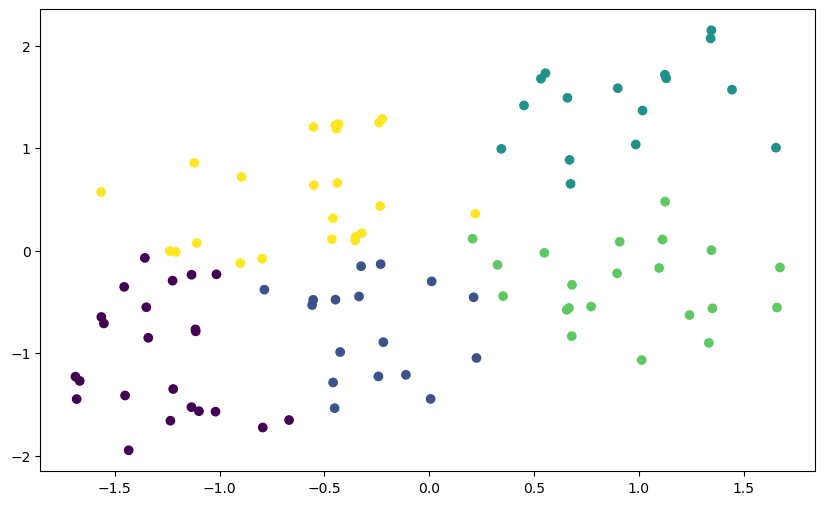

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(x= testing_sample.iloc[:,0], y=testing_sample.iloc[:,1], c=Clusters_test)

## Using Pre- Defined

In [60]:
from sklearn.cluster import KMeans

In [63]:
km2 = KMeans(n_clusters=5)
x_clustered = km2.fit_predict(testing_sample)

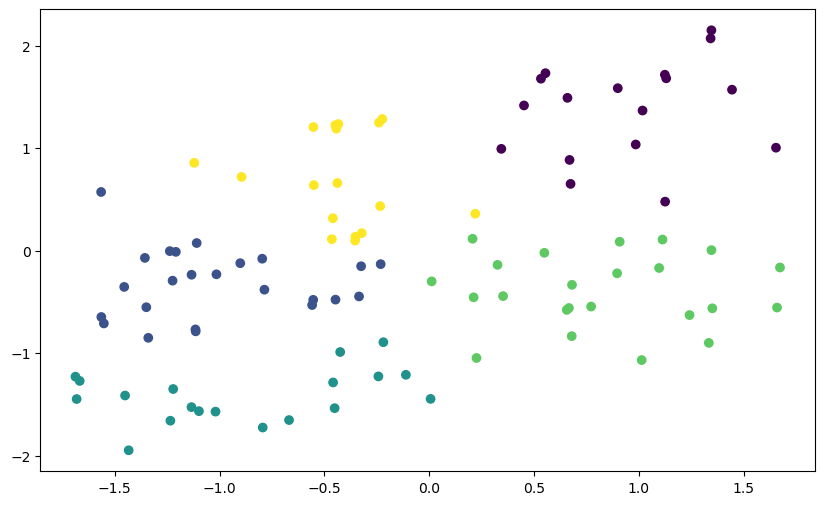

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x= testing_sample.iloc[:,0], y=testing_sample.iloc[:,1], c=x_clustered)

# The END :))))